In [5]:
from tensorflow import keras
import numpy as np
from keras.datasets import mnist
from matplotlib import pyplot
import random as random
import matplotlib.pyplot as plt

In [27]:
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()
SCALE_FACTOR = 255
WIDTH = train_X.shape[1]
HEIGHT = train_X.shape[2]

print(train_X.shape)
train_X = train_X.reshape(train_X.shape[0], WIDTH*HEIGHT).T / SCALE_FACTOR
test_X = test_X.reshape(test_X.shape[0], WIDTH*HEIGHT).T  / SCALE_FACTOR
print(train_X.shape)
train_X[0].shape

(60000, 28, 28)
(784, 60000)


(60000,)

In [7]:
def init_params(size):
    w1 = np.random.rand(10, size) - 0.5
    b1 = np.random.rand(10, 1) -0.5
    w2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return w1, b1, w2, b2

def relU(Z):
    return np.maximum(Z, 0)

def deriv_relU(relu):
    return relu > 0

def softmax(Z):
    exp = np.exp(Z - np.max(Z))
    return exp / exp.sum(axis=0)

def one_hot(Y):
    one_hot_Y = np.zeros((Y.max()+1,Y.size))
    one_hot_Y[Y, np.arange(Y.size)] = 1
    return one_hot_Y


######################################################################
def forward_prop(w1, b1, w2, b2, X):
    Z1 = w1.dot(X) + b1
    A1 = relU(Z1)
    Z2 = w2.dot(A1) + b2
    A2 = softmax(Z2)
    
    return Z1, A1, Z2, A2

def back_prop(Z2, A2, Z1, A1, w2, X, Y, m):
    one_hot_Y = one_hot(Y)
    
    dZ2 = 2*(A2 - one_hot_Y)
    dw2 = (1/m) * (dZ2.dot(A1.T))
    db2 = (1/m) * (np.sum(dZ2, 1))
    
    dZ1 = w2.T.dot(dZ2) * deriv_relU(Z1)
    dw1 = (1/m) * (dZ1.dot(X.T))
    db1 = (1/m) * np.sum(dZ1, 1)
    
    return dw1, db1, dw2, db2

def update_param(w1, b1, w2, b2, dw1, db1, dw2, db2, lr):
    w1 = w1 - lr*dw1
    b1 = b1 - lr* np.reshape(db1, (10,1))
    
    w2 = w2 - lr*dw2
    b2 = b2 - lr* np.reshape(db2, (10,1))
    
    return w1, b1, w2, b2


######################################################################
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y)/Y.size

def grad_descent(X, Y, iterations, lr):
    size , m = X.shape
    w1, b1, w2, b2 = init_params(size)
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(w1, b1, w2, b2, X)
        dw1, db1, dw2, db2 = back_prop(Z2, A2, Z1, A1, w2, X, Y, m)
        w1, b1, w2, b2 = update_param(w1, b1, w2, b2, dw1, db1, dw2, db2, lr)
        if i%50 == 0:
            print("Iteration: ", i, '\nAccuracy: ', get_accuracy(get_predictions(A2), Y))
    return w1, b1, w2, b2

In [8]:
w1, b1, w2, b2 = grad_descent(train_X, train_Y, 300, 0.15)

Iteration:  0 
Accuracy:  0.10406666666666667
Iteration:  50 
Accuracy:  0.7269
Iteration:  100 
Accuracy:  0.80045
Iteration:  150 
Accuracy:  0.8407666666666667
Iteration:  200 
Accuracy:  0.858
Iteration:  250 
Accuracy:  0.8679


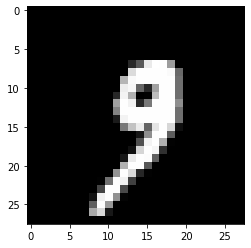

Label:  9
Prediction:  [9]


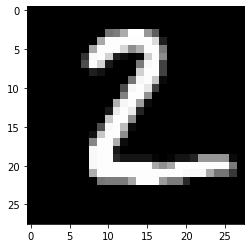

Label:  2
Prediction:  [2]


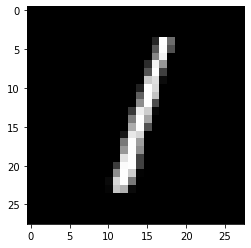

Label:  1
Prediction:  [1]


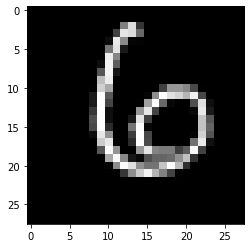

Label:  6
Prediction:  [6]


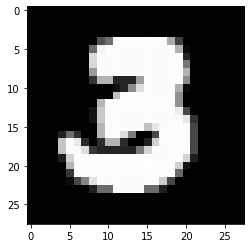

Label:  3
Prediction:  [3]


In [17]:
def make_predictions(X, w1 ,b1, w2, b2):
    _, _, _, A2 = forward_prop(w1, b1, w2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def show_prediction(index,X, Y, W1, b1, W2, b2):
    vect_X = X[:, index,None]
    prediction = make_predictions(vect_X, W1, b1, W2, b2)
    label = Y[index]
    current_image = vect_X.reshape((WIDTH, HEIGHT)) * SCALE_FACTOR

    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()
    print("Label: ", label)
    print("Prediction: ", prediction)
    
show_prediction(1000 , test_X, test_Y, w1, b1, w2, b2)
show_prediction(1,test_X, test_Y, w1, b1, w2, b2)
show_prediction(2,test_X, test_Y, w1, b1, w2, b2)
show_prediction(100,test_X, test_Y, w1, b1, w2, b2)
show_prediction(200,test_X, test_Y, w1, b1, w2, b2)